In [2]:
## Examples for generation of PCFGs and plots of useful quantities.

In [3]:
import sys
import math
import numpy as np
sys.path.append('../syntheticpcfg')
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [4]:
import inside
import pcfg
import utility


In [5]:
import pcfgfactory

pcfgfactory1 = pcfgfactory.PCFGFactory()
pcfgfactory1.lexical_distribution = pcfgfactory.LexicalPitmanYor()

pcfgfactory1.length_distribution.cds()

In [6]:
pcfgfactory1.cfgfactory.number_terminals = 10000
pcfgfactory1.cfgfactory.number_nonterminals = 20
pcfgfactory1.cfgfactory.binary_rules = 50
pcfgfactory1.cfgfactory.lexical_rules = 10000


upcfg = pcfgfactory1.sample()


20 10000 50 10000


In [7]:
print(len(upcfg.nonterminals),len(upcfg.terminals),len(upcfg.productions))


20 6368 10050


In [8]:
import uniformsampler
max_length = 20
n_samples = 100
us = uniformsampler.UniformSampler(upcfg,max_length)
x = []
yc = []
y = []
for l in range(1,max_length+1):
    x.append(l)
    y.append(us.string_density(l,n_samples))
    yc.append(us.string_density_crude(l,n_samples))

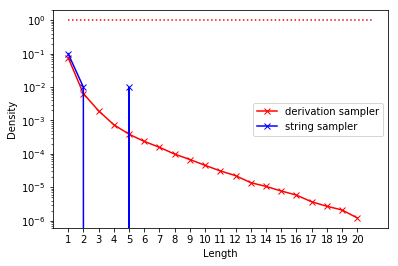

In [9]:
plt.plot(x,y,'rx-',label="derivation sampler")
plt.plot(x,yc,'bx-',label="string sampler")
plt.plot([1,max_length+1],[1.0,1.0],'r:')
plt.xlabel("Length")
plt.ylabel('Density')
plt.yscale('log')
plt.xticks(range(1,max_length+1))
plt.legend()
plt.show()

In [17]:
# Length distribution.
lpcfg = upcfg.make_unary()
linsider = inside.InsideComputation(lpcfg)
L = 21
a = pcfg.UNARY_SYMBOL
x = []
y = []
for i in range(1,L):
    x.append(i)
    s = (a,) * i
    p = math.exp(linsider.inside_log_probability(s))
    y.append(p)

AttributeError: Unknown property legend

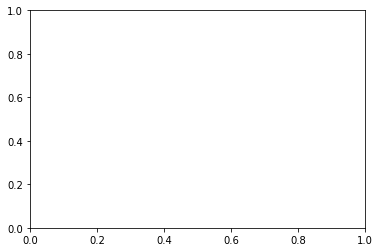

In [21]:
plt.plot(x,y, legend = "Grammar")
target = pcfgfactory1.length_distribution.weights
xt = range(1, len(target))
yt = [ target[i]/sum(target) for i in xt]
plt.plot(xt,yt,"r:",legend = "Target")
plt.xlabel("Probability")
plt.ylabel("Length")
plt.xticks(x)
plt.legend()
plt.show()

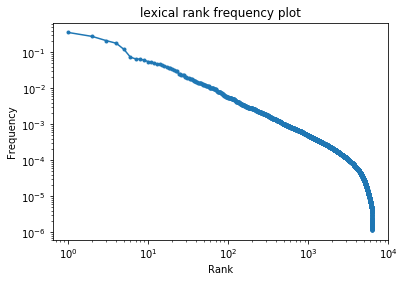

In [12]:
# Lexical distribution
te = upcfg.terminal_expectations()
probs = [ te[a] for a in te]
probs.sort(key = lambda x : -x)
ranks = np.arange(1, len(probs)+1)
plt.plot(ranks, probs, rasterized=True,marker=".")
plt.yscale('log')
plt.xscale('log')
plt.xlabel('Rank')
plt.ylabel('Frequency')

plt.title("lexical rank frequency plot")
plt.show()

In [13]:
# ambiguity: H(tree|string)
upcfg.estimate_ambiguity(samples=1000)

0.024301536386745166

In [14]:
# ambiguity ; derivations per string.
sampler = pcfg.Sampler(upcfg)
counter = inside.InsideComputation(upcfg)
derivations = Counter()
strings = Counter()
max_length = 30
n_samples = int(1e5)
for i in range(n_samples):
    s = utility.collect_yield(sampler.sample_tree())
    l = len(s)
    if l <= max_length:
        n = counter.count_parses(s)
        strings[l] += 1
        derivations[l] += n


Text(0,0.5,'Mean derivations per string')

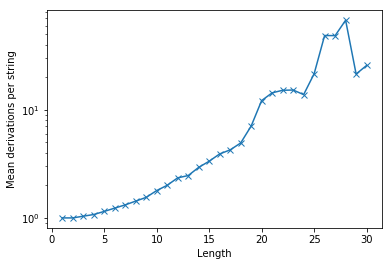

In [15]:
x = [list(strings)][0]
x.sort()
y = [ derivations[i]/strings[i] for i in x]
plt.plot(x,y,'x-')
plt.yscale('log')
plt.xlabel('Length')
plt.ylabel('Mean derivations per string')